In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
train=pd.read_csv(r"/content/Training.csv")
test=pd.read_csv(r"/content/Testing.csv")

In [3]:
train.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  

[5 rows x 134 columns]

In [4]:
train.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
train.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count       4920.000000  ...  4920.000000  4920.000000   4920.000000   
mean           0.021951  ...     0.021951     0.021951      0.023171   
std            0.146539  ...     0.146539     0.146539      0.150461   
min            0.000000  ...     0.000000     0.000000      0.000000   
25%            0.000000  ...     0.000000     0.000000      0.000000   
50%            0.000000  ...     0.000000     0.000000      0.000000   
75%            0.000000  ...     0.000000     0.000000      0.000000   
max            1.000000  ...     1.000000     1.000000      1.000000   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count          4920.000000           4920.000000         4920.000000   
mean              0.023171              0.023171            0.023171   
std               0.150461              0.150461            0.150461   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

           blister  red_sore_around_nose  yellow_crust_ooze  Unnamed: 133  
count  4920.000000           4920.000000        4920.000000           0.0  
mean      0.023171              0.023171           0.023171           NaN  
std       0.150461              0.150461           0.150461           NaN  
min       0.000000              0.000000           0.000000           NaN  
25%       0.000000              0.000000           0.000000           NaN  
50%       0.000000              0.000000           0.000000           NaN  
75%       0.000000              0.000000           0.000000           NaN  
max       1.000000              1.000000           1.000000           NaN  

[8 rows x 133 columns]

In [7]:
train=train.drop(["Unnamed: 133"],axis=1)

In [8]:
train.prognosis.value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [11]:
col=train.columns
col

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

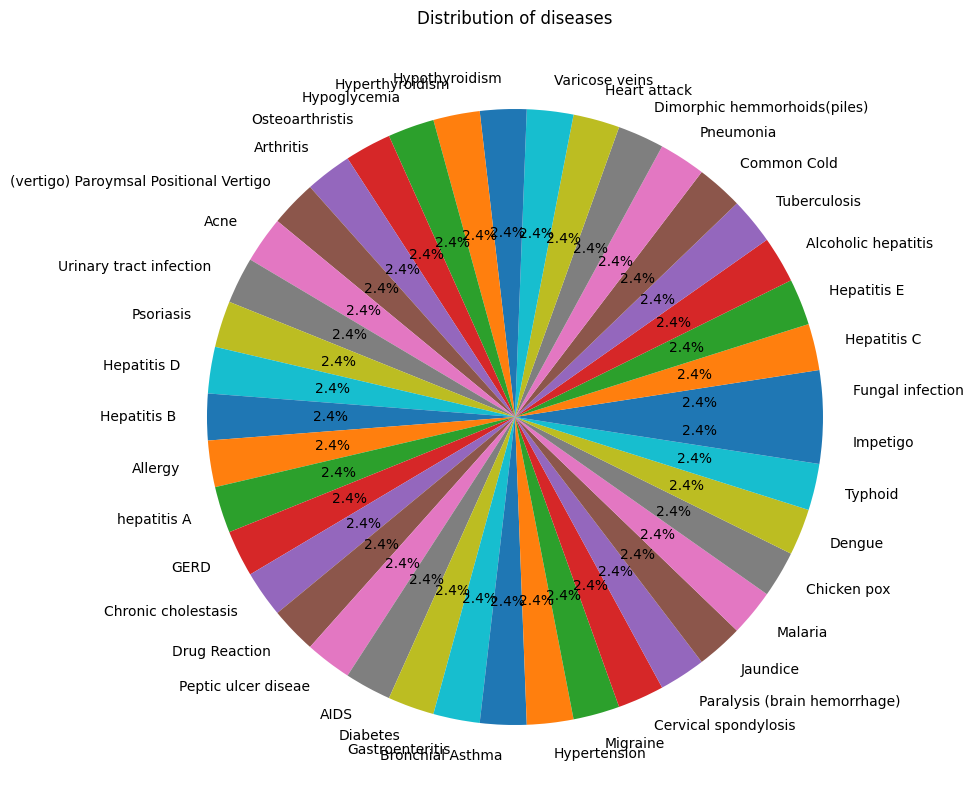

In [12]:
diseases = ["Fungal infection", "Hepatitis C", "Hepatitis E", "Alcoholic hepatitis", "Tuberculosis", "Common Cold", "Pneumonia", "Dimorphic hemmorhoids(piles)", "Heart attack", "Varicose veins", "Hypothyroidism", "Hyperthyroidism", "Hypoglycemia", "Osteoarthristis", "Arthritis", "(vertigo) Paroymsal Positional Vertigo", "Acne", "Urinary tract infection", "Psoriasis", "Hepatitis D", "Hepatitis B", "Allergy", "hepatitis A", "GERD", "Chronic cholestasis", "Drug Reaction", "Peptic ulcer diseae", "AIDS", "Diabetes", "Gastroenteritis", "Bronchial Asthma", "Hypertension", "Migraine", "Cervical spondylosis", "Paralysis (brain hemorrhage)", "Jaundice", "Malaria", "Chicken pox", "Dengue", "Typhoid", "Impetigo"]

cases = [120] * len(diseases)

plt.figure(figsize=(10, 10))
plt.pie(cases, labels=diseases, autopct='%1.1f%%')
plt.title("Distribution of diseases")
plt.show()

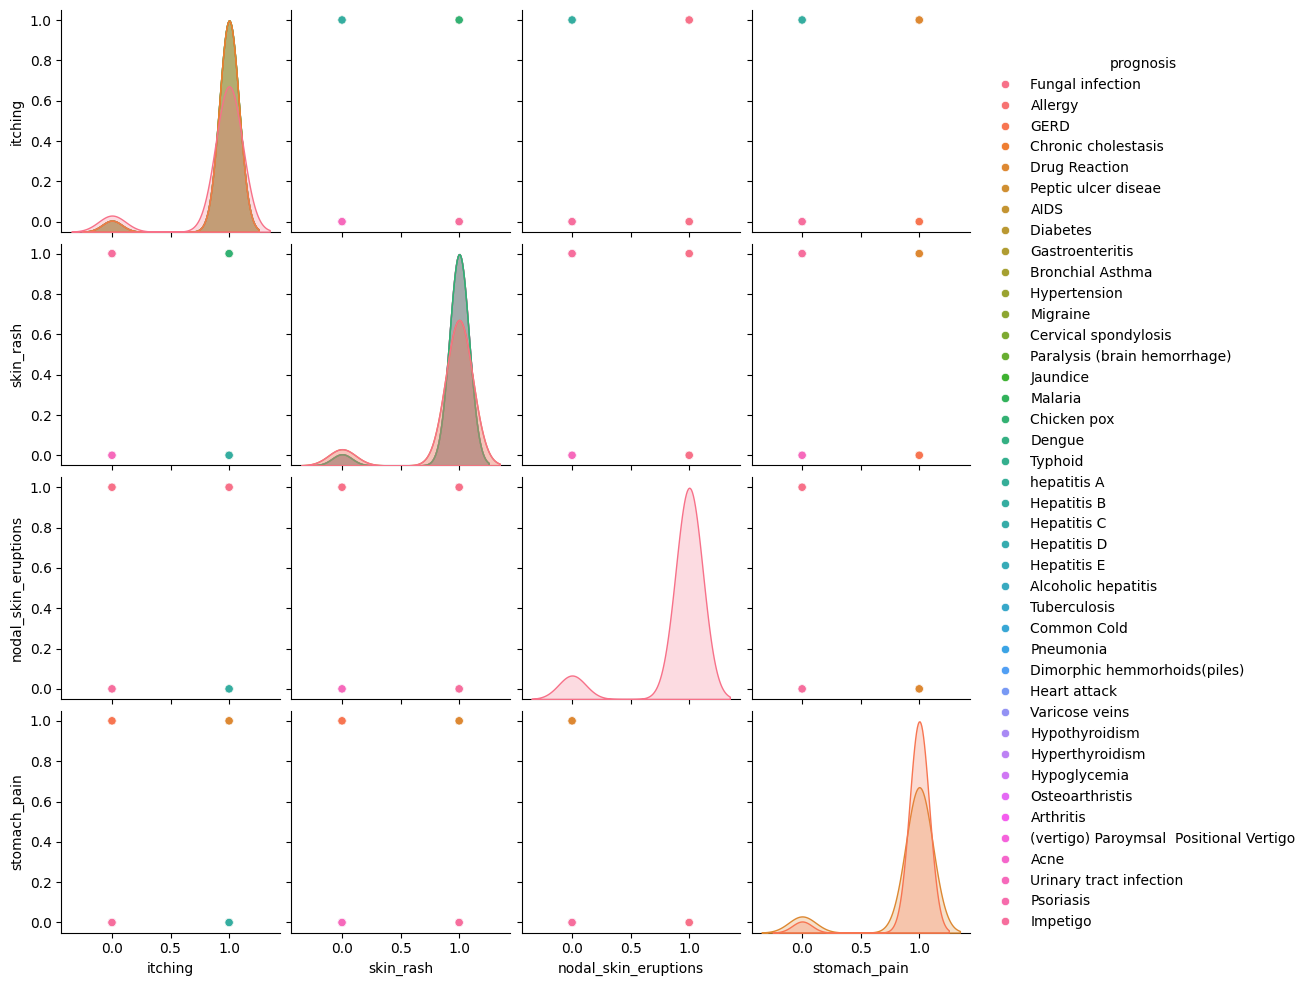

In [13]:
selected_columns = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'stomach_pain', 'prognosis']

train_selected = train[selected_columns]

sns.pairplot(train_selected, hue='prognosis')

plt.show()

In [14]:
P = train[["prognosis"]]
X = train.drop(["prognosis"],axis=1)
Y = test.drop(["prognosis"],axis=1)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,P,test_size=0.2,random_state=42)

In [16]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(x_train,y_train)
tr_pred_rf = model_rf.predict(x_train)
ts_pred_rf = model_rf.predict(x_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rf))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rf))

<ipython-input-16-2a655bf3f7df>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = rf.fit(x_train,y_train)


training accuracy is: 1.0
testing accuracy is: 1.0


In [17]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predictions1 = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the Logistic Regression Model is:  1.0


In [18]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0


In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from matplotlib.colors import ListedColormap

In [20]:
df = pd.read_csv("/content/Training.csv")
df.drop('Unnamed: 133', axis=1, inplace=True)
test=pd.read_csv("/content/Testing.csv")
train=pd.read_csv("/content/Training.csv")

In [21]:
train.sample(n=1)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
4905        0          0                     0                    1   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
4905          0       1           0             0        0                 0   

      ...  scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
4905  ...         0             0                    0                     0   

      inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
4905                   0        0                     0                  0   

        prognosis  Unnamed: 133  
4905  Common Cold           NaN  

[1 rows x 134 columns]

In [22]:
train.sample(n=1)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
182        0          0                     0                    0          0   

     chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
182       1           0             0        0                 0  ...   

     scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
182         0             0                    0                     0   

     inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
182                   0        0                     0                  0   

     prognosis  Unnamed: 133  
182    Typhoid           NaN  

[1 rows x 134 columns]

In [24]:
print(df.describe())
print('---------------------------------------------------------------')
print(df.info())
print('---------------------------------------------------------------')
print(df.columns)
print('---------------------------------------------------------------')

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593 

In [25]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [26]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [27]:
x = df.drop('prognosis', axis = 1)
y = df['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_acc = accuracy_score(y_test, tree_pred)

print("Decision Tree Classifier:")
print("Accuracy on test set: {:.2f}%".format(tree_acc * 100))

Decision Tree Classifier:
Accuracy on test set: 100.00%


In [29]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
forest_acc = accuracy_score(y_test, forest_pred)

print("Random Forest Classifier:")
print("Accuracy on test set: {:.2f}%".format(forest_acc * 100))

Random Forest Classifier:
Accuracy on test set: 100.00%


In [30]:
import pickle
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(logreg, file)

In [31]:
z=[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
z_reshaped = np.array(z).reshape(1, -1)

logreg_confidence = logreg.predict_proba(z_reshaped)
print(logreg_confidence)
logreg_pred = logreg.predict(z_reshaped)
print(logreg_pred)
max_confidence = max(logreg_confidence[0])
print("Maximum confidence:", max_confidence)

[[1.06460542e-03 2.34890589e-03 1.04627638e-02 1.03025967e-03
  3.07277799e-03 1.99184830e-03 1.26549834e-03 2.04245096e-03
  3.27658229e-03 4.72400226e-03 3.99908217e-04 4.94777636e-04
  8.72227650e-04 2.24436442e-03 2.64675039e-02 9.01595337e-01
  1.16037634e-03 2.56658713e-03 2.46257374e-03 1.03566226e-03
  9.95918523e-04 1.37532853e-04 1.86369590e-04 1.75228076e-03
  7.07596982e-04 4.60179709e-04 7.15122542e-04 6.20241923e-03
  2.07181695e-03 5.60970930e-04 1.04759391e-03 1.54267145e-03
  2.20542278e-03 1.19170608e-03 6.00870956e-04 4.48940261e-03
  1.93450710e-04 3.21250979e-04 2.29642962e-03 1.42833857e-03
  3.13641216e-04]]
['Fungal infection']
Maximum confidence: 0.9015953368093998


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
P = train[["prognosis"]]
X = train.drop(["prognosis"],axis=1)
Y = test.drop(["prognosis"],axis=1)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [34]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(x_train,y_train)
tr_pred_rf = model_rf.predict(x_train)
ts_pred_rf = model_rf.predict(x_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rf))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rf))

training accuracy is: 1.0
testing accuracy is: 1.0


In [35]:
test.join(pd.DataFrame(model_rf.predict(Y),columns=["predicted"]))[["prognosis","predicted"]]

prognosis  \
0                          Fungal infection   
1                                   Allergy   
2                                      GERD   
3                       Chronic cholestasis   
4                             Drug Reaction   
5                       Peptic ulcer diseae   
6                                      AIDS   
7                                 Diabetes    
8                           Gastroenteritis   
9                          Bronchial Asthma   
10                            Hypertension    
11                                 Migraine   
12                     Cervical spondylosis   
13             Paralysis (brain hemorrhage)   
14                                 Jaundice   
15                                  Malaria   
16                              Chicken pox   
17                                   Dengue   
18                                  Typhoid   
19                              hepatitis A   
20                              Hepatitis B   
21                              Hepatitis C   
22                              Hepatitis D   
23                              Hepatitis E   
24                      Alcoholic hepatitis   
25                             Tuberculosis   
26                              Common Cold   
27                                Pneumonia   
28             Dimorphic hemmorhoids(piles)   
29                             Heart attack   
30                           Varicose veins   
31                           Hypothyroidism   
32                          Hyperthyroidism   
33                             Hypoglycemia   
34                          Osteoarthristis   
35                                Arthritis   
36  (vertigo) Paroymsal  Positional Vertigo   
37                                     Acne   
38                  Urinary tract infection   
39                                Psoriasis   
40                                 Impetigo   
41                         Fungal infection   

                                  predicted  
0                          Fungal infection  
1                                   Allergy  
2                                      GERD  
3                       Chronic cholestasis  
4                             Drug Reaction  
5                       Peptic ulcer diseae  
6                                      AIDS  
7                                 Diabetes   
8                           Gastroenteritis  
9                          Bronchial Asthma  
10                            Hypertension   
11                                 Migraine  
12                     Cervical spondylosis  
13             Paralysis (brain hemorrhage)  
14                                 Jaundice  
15                                  Malaria  
16                              Chicken pox  
17                                   Dengue  
18                                  Typhoid  
19                              hepatitis A  
20                              Hepatitis B  
21                              Hepatitis C  
22                              Hepatitis D  
23                              Hepatitis E  
24                      Alcoholic hepatitis  
25                             Tuberculosis  
26                              Common Cold  
27                                Pneumonia  
28             Dimorphic hemmorhoids(piles)  
29                             Heart attack  
30                           Varicose veins  
31                           Hypothyroidism  
32                          Hyperthyroidism  
33                             Hypoglycemia  
34                          Osteoarthristis  
35                                Arthritis  
36  (vertigo) Paroymsal  Positional Vertigo  
37                                     Acne  
38                  Urinary tract infection  
39                                Psoriasis  
40                                 Impetigo  
41                                 Impetigo